# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint


####Regression using MLP with MSE Loss

The objective of this case study is to understand regression i.e., to predict the price of the house using Multilayer perceptron with Cross Entropy Loss.  The package used here is  [PyTorch](https://pytorch.org/). 

#### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P18_test" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "912345678" #@param {type:"string"}


In [3]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython
ipython = get_ipython()
  
notebook="BLR_M2W6_SUN_CS_2" #name of the notebook

def setup():
    #ipython.magic("sx wget https://www.dropbox.com/s/vu7xkf6j3v9p5np/AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt.zip?dl=1")
   # ipython.magic("sx unzip AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt.zip?dl=1")
    ipython.magic("sx pip install torch")
    print ("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print("Please enter valid Id")
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "id" : Id, "file_hash" : file_hash, "notebook" : notebook}

      r = requests.post(url, data = data)
      print("Your submission is successful. Ref:", submission_id)
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


In [0]:
# Importing required Packages
import matplotlib.pyplot as plt
import numpy as np
import  torch
from torch import nn
from sklearn.preprocessing import StandardScaler

In [0]:
#The attributes of related House price are stored in "X" as features. 
X = np.array([[3, 2000, 90], [2, 800, 143], [2, 850, 167], [1, 550, 267], [4, 2000, 396]])
#The prices of the houses are stored in "y" as labels
y =  np.array([23.0, 8, 9.0, 9.0 , 25.0])


In [6]:
#Standard scaling the features "X"
ss = StandardScaler()
ss.fit(X)
X = ss.transform(X)
X

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.58834841,  1.20863526, -1.13296108],
       [-0.39223227, -0.6997362 , -0.64318182],
       [-0.39223227, -0.62022073, -0.42139498],
       [-1.37281295, -1.09731359,  0.50271682],
       [ 1.56892908,  1.20863526,  1.69482106]])

In [0]:
#Defining the model for Linear Regression with MLP using PyTorch's nn.Module
class LinearRegressionModel(nn.Module):

    def __init__(self, input_dim, output_dim):

        super(LinearRegressionModel, self).__init__() 
        # Calling Super Class's constructor
        self.linear1 = nn.Linear(input_dim, 4)
        self.sigmoid = nn.Sigmoid()
        self.linear2 = nn.Linear(4, output_dim)
        # nn.Linear is defined in nn.Module

    def forward(self, x):
        # Here the forward pass is simply a linear function
        #print(x.size())
        out = self.sigmoid(self.linear1(x))
        out = self.linear2(out)
        return out

input_dim = 3
output_dim = 1

In [0]:
nn.Sigmoid?

From the above defined model, we 3 neurons in the input layer, 4 neurons in the hidden layer and 1 neuron in the output layer. 

![alt text](https://cdn.talentsprint.com/aiml/Experiment_related_data/IMAGES/MLP_Regression.png)

In [0]:
model = LinearRegressionModel(input_dim,output_dim)#The LinearRegressionModel() is saved in model
criterion = nn.MSELoss()# Mean Squared Loss
l_rate = 0.01 #Learning Rate
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate) #Stochastic Gradient Descent

epochs = 500 #number of epochs

Here, we are using MSE Loss for two classes and Stochastic Gradient Descent on the entire batch.


It creates a criterion that measures the mean squared error between
    `n` elements in the input `x` and target `y`.

The loss can be described as:

$\ell(x, y) = L = \{l_1,\dots,l_N\}^\top, \quad
        l_n = \left( x_n - y_n \right)^2$

 
The losses are averaged across observations for the batch.

For more details, can follow this [link](https://pytorch.org/docs/stable/_modules/torch/nn/modules/loss.html). 

In [17]:
#Storing the losses in a list for the prescribed epochs
losses = []
for epoch in range(epochs):
#increase the number of epochs by 1 every time
    epoch +=1
    inputs = torch.from_numpy(X.astype(np.float32))
    labels = torch.from_numpy(y.astype(np.float32))
    #clear grads as discussed in prev post
    optimiser.zero_grad()
    #forward to get predicted values
    outputs = model.forward(inputs)
    #print('outputs: ', outputs.size())
    #print('labels: ', labels.size())
    loss = criterion(outputs, labels.unsqueeze(1))
    loss.backward()# back props
    optimiser.step()# update the parameters
    print('epoch {}, loss {}'.format(epoch,loss.item()))
    losses.append(loss.item())
    if (epoch-1)%5 == 0:
        for i in model.parameters():
            print(i)

epoch 1, loss 268.8075866699219
Parameter containing:
tensor([[-0.3333,  0.1166,  0.0509],
        [-0.2005,  0.1971,  0.0016],
        [-0.5233, -0.1898,  0.4205],
        [-0.0365, -0.0681, -0.4328]], requires_grad=True)
Parameter containing:
tensor([ 0.3277,  0.1913, -0.1399, -0.0165], requires_grad=True)
Parameter containing:
tensor([[ 0.4048, -0.0342,  0.1266, -0.0773]], requires_grad=True)
Parameter containing:
tensor([0.6084], requires_grad=True)
epoch 2, loss 252.11549377441406
epoch 3, loss 236.7325897216797
epoch 4, loss 222.35980224609375
epoch 5, loss 208.7726287841797
epoch 6, loss 195.80780029296875
Parameter containing:
tensor([[-0.2132,  0.2468,  0.0923],
        [-0.1568,  0.2446,  0.0176],
        [-0.4689, -0.1357,  0.4474],
        [-0.0122, -0.0403, -0.4269]], requires_grad=True)
Parameter containing:
tensor([ 0.5425,  0.2696, -0.0455,  0.0315], requires_grad=True)
Parameter containing:
tensor([[1.1550, 0.6786, 0.6468, 0.5226]], requires_grad=True)
Parameter contai

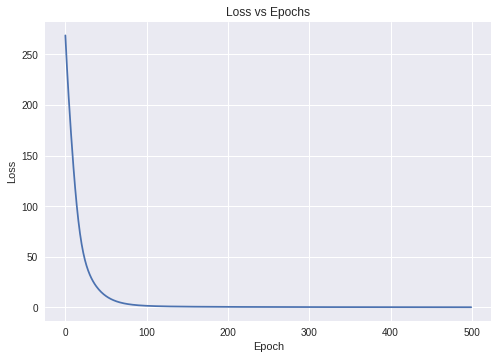

In [18]:
#Plotting Loss vs Epochs
fig,ax = plt.subplots(1)
plt.title('Loss vs Epochs')
ax.plot(losses)
#ax.set_xticklabels([])
#ax.set_yticklabels([])
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
plt.savefig('Loss_vs_Epoch.png')

### Please answer the questions below to complete the experiment:

In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "No" #@param ["Yes", "No"]

In [0]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful. Ref: 14869
